<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/haar_cascade_classifier_car_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will be working on detecting and counting vehicles in a given image or a video. We will be using OpenCV for image processing and Haar cascade which is used for object detection. We can also create our own customized **haar cascade classifier**. 

As haar cascade is used for object detection we have a very vast scope for this project. It can be used for any type of object detection. We can also create our own custom haar cascade for specific object.

In [1]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

Next we will fetch the image from the internet that we will be working on. We will then resize the image and convert it into a **numpy array**.

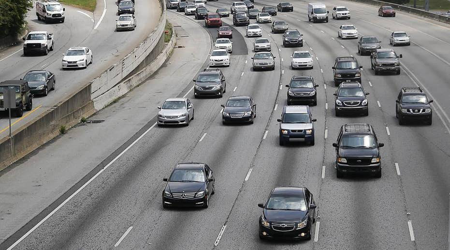

In [2]:
# Reading image form url
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

Now in order **to get better output**, we will perform some transformations on the image. Here we wil convert the image into grayscale. 

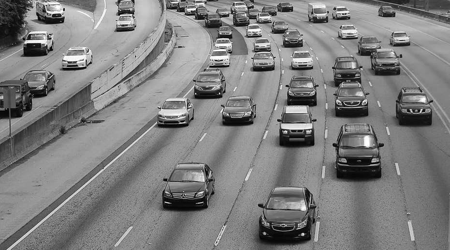

In [3]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

Next we will apply GaussianBlur **to remove the noise from the image**. Instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. 

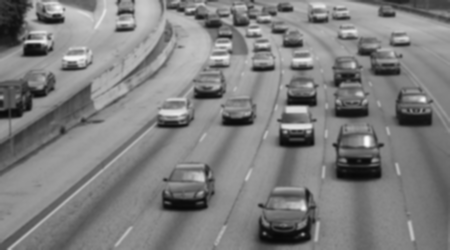

In [4]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Here we will dilate image. It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. 

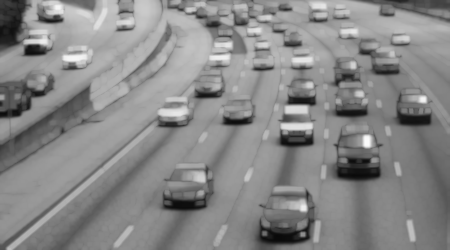

In [5]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

Now we will perform Morphology transformation with kernel. MorphologyEx is used to find the difference between dilation and erosion of an image.
You may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

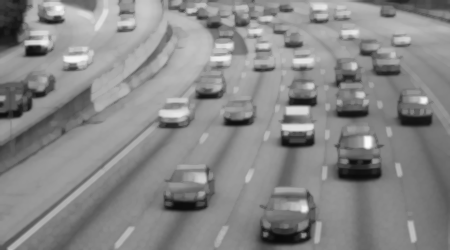

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

Now we need car cascade to detect cars. So, we first need to upload them to collab and then specify the path to car_cascade_src. OpenCV provides a training method (see Cascade Classifier Training) or pretrained models, that can be read using cv2.CascadeClassifier() method. We need to detect multiple objects i.e. cars so we will use detectMultiScale. Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [9]:
car_cascade_src = '/content/car.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

SystemError: ignored

Now we will use the above returned contours and draw a rectangle around detected cars. Here we will see that it will create the rectangle with red boundary around each and every car it detects.

In [ ]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [ ]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

In [ ]:
bus_cascade_src = '../input/carandbusdetection/Required Files/Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)



In [ ]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

Now we will perform the vehicle detection and counting in a video. For creating the output video from frames or images we need cv2.VideoWriter() method. It take path with extension as first parameter, second parameter is the codec for output format, then we also need to pass frames per second and height and width. 

In [ ]:
cascade_src = '../input/carandbusdetection/Required Files/cars.xml'
video_src = '../input/carandbusdetection/Required Files/Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))   

In [ ]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img) 
video.release()